In [1]:
#Knn Assignment
#submitted by - Sanjana pal

## using Zoo dataset

### Implement a KNN model to classify the animals in to categorie

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pe
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=350
%matplotlib inline

In [3]:
df = pd.read_csv("Zoo.csv")

In [4]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


- first we describe the data to check presence of outlier.

In [5]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [6]:
df['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [7]:
df =df.drop('animal name',axis='columns')

### here we are going to drop the column 'animal name',beacuse it is no in numerical format.

In [8]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


### after describing the data,it shows minimum value is 0, and it is not possible.So to correct the data we are going to add 'median' value instead of 0.

In [9]:
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [10]:
df.loc[:,'hair':'catsize'] = df.loc[:,'hair':'catsize'].replace(0,np.nan)

In [11]:
df.isna().sum()

hair        58
feathers    81
eggs        42
milk        60
airborne    77
aquatic     65
predator    45
toothed     40
backbone    18
breathes    21
venomous    93
fins        84
legs        23
tail        26
domestic    88
catsize     57
type         0
dtype: int64

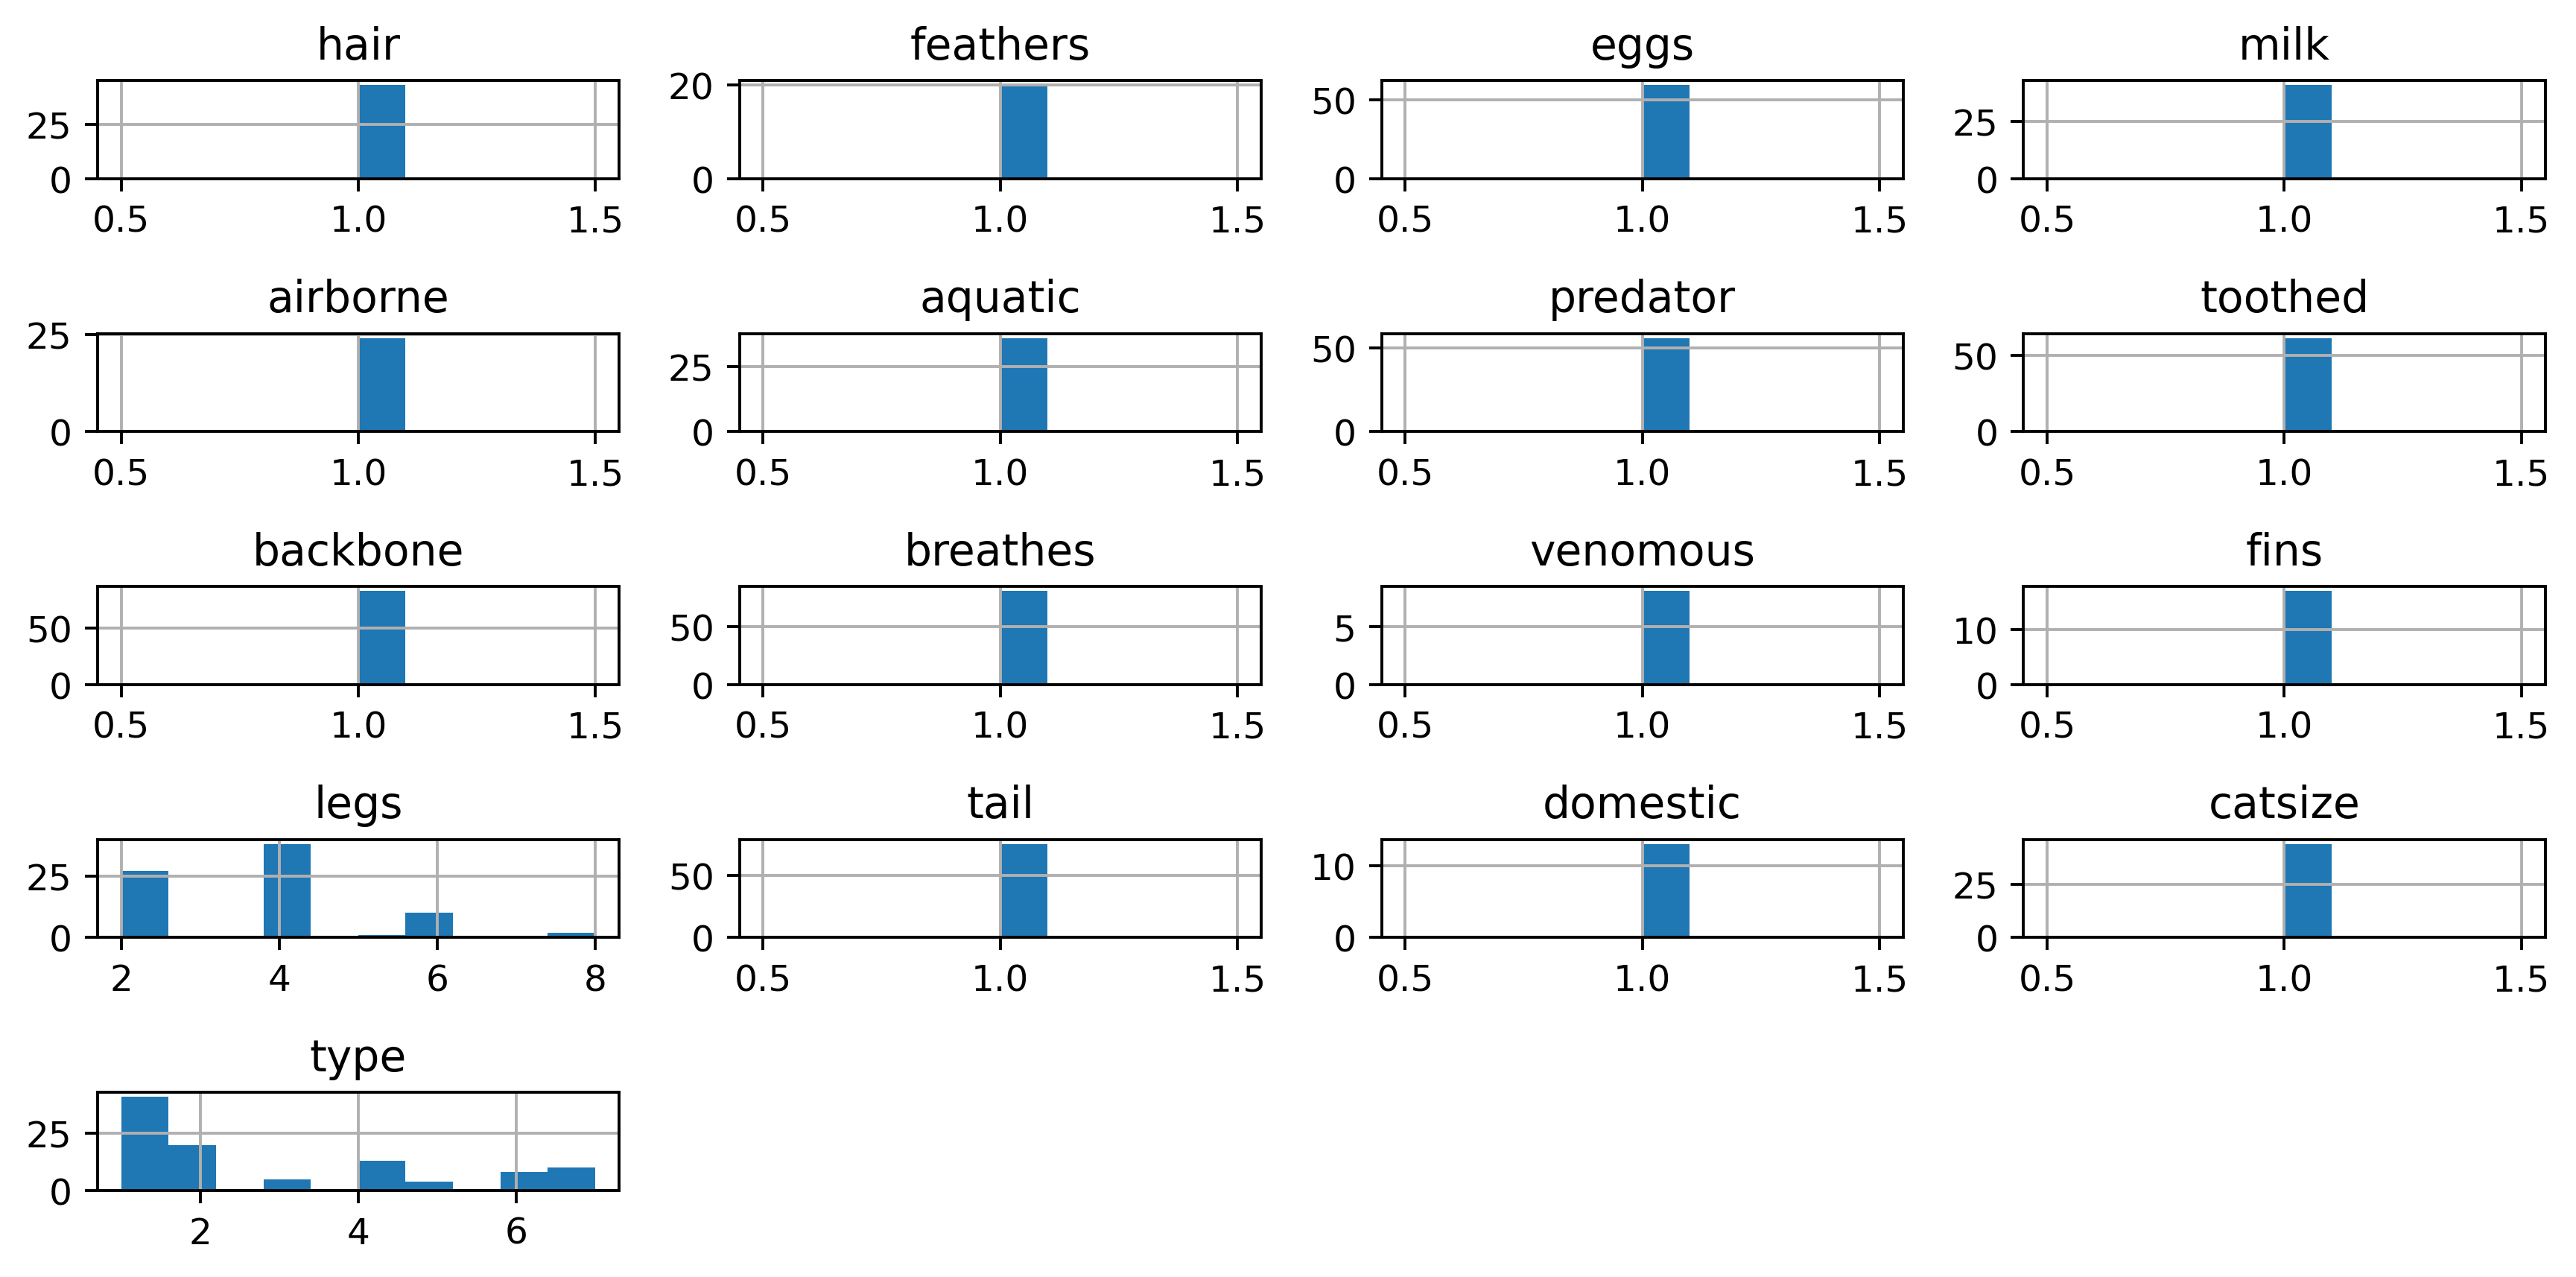

In [12]:
df.hist()
plt.tight_layout()

In [13]:
sns.pairplot(df)

In [14]:
from sklearn.impute import SimpleImputer
# using simple imputer we can impute the value into multiple columns instead of imputing values in one by one columns

In [15]:
si = SimpleImputer(strategy='median')


In [16]:
df.loc[:,'hair':'catsize']= si.fit_transform(df.loc[:,'hair':'catsize'])

In [17]:
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [18]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.000000,101.0,101.0,101.0,101.000000
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.752475,1.0,1.0,1.0,2.831683
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.322164,0.0,0.0,0.0,2.102709
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1.000000
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1.000000
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,2.000000
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,4.000000
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.000000,1.0,1.0,1.0,7.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hair      101 non-null    float64
 1   feathers  101 non-null    float64
 2   eggs      101 non-null    float64
 3   milk      101 non-null    float64
 4   airborne  101 non-null    float64
 5   aquatic   101 non-null    float64
 6   predator  101 non-null    float64
 7   toothed   101 non-null    float64
 8   backbone  101 non-null    float64
 9   breathes  101 non-null    float64
 10  venomous  101 non-null    float64
 11  fins      101 non-null    float64
 12  legs      101 non-null    float64
 13  tail      101 non-null    float64
 14  domestic  101 non-null    float64
 15  catsize   101 non-null    float64
 16  type      101 non-null    int64  
dtypes: float64(16), int64(1)
memory usage: 13.5 KB


<AxesSubplot:>

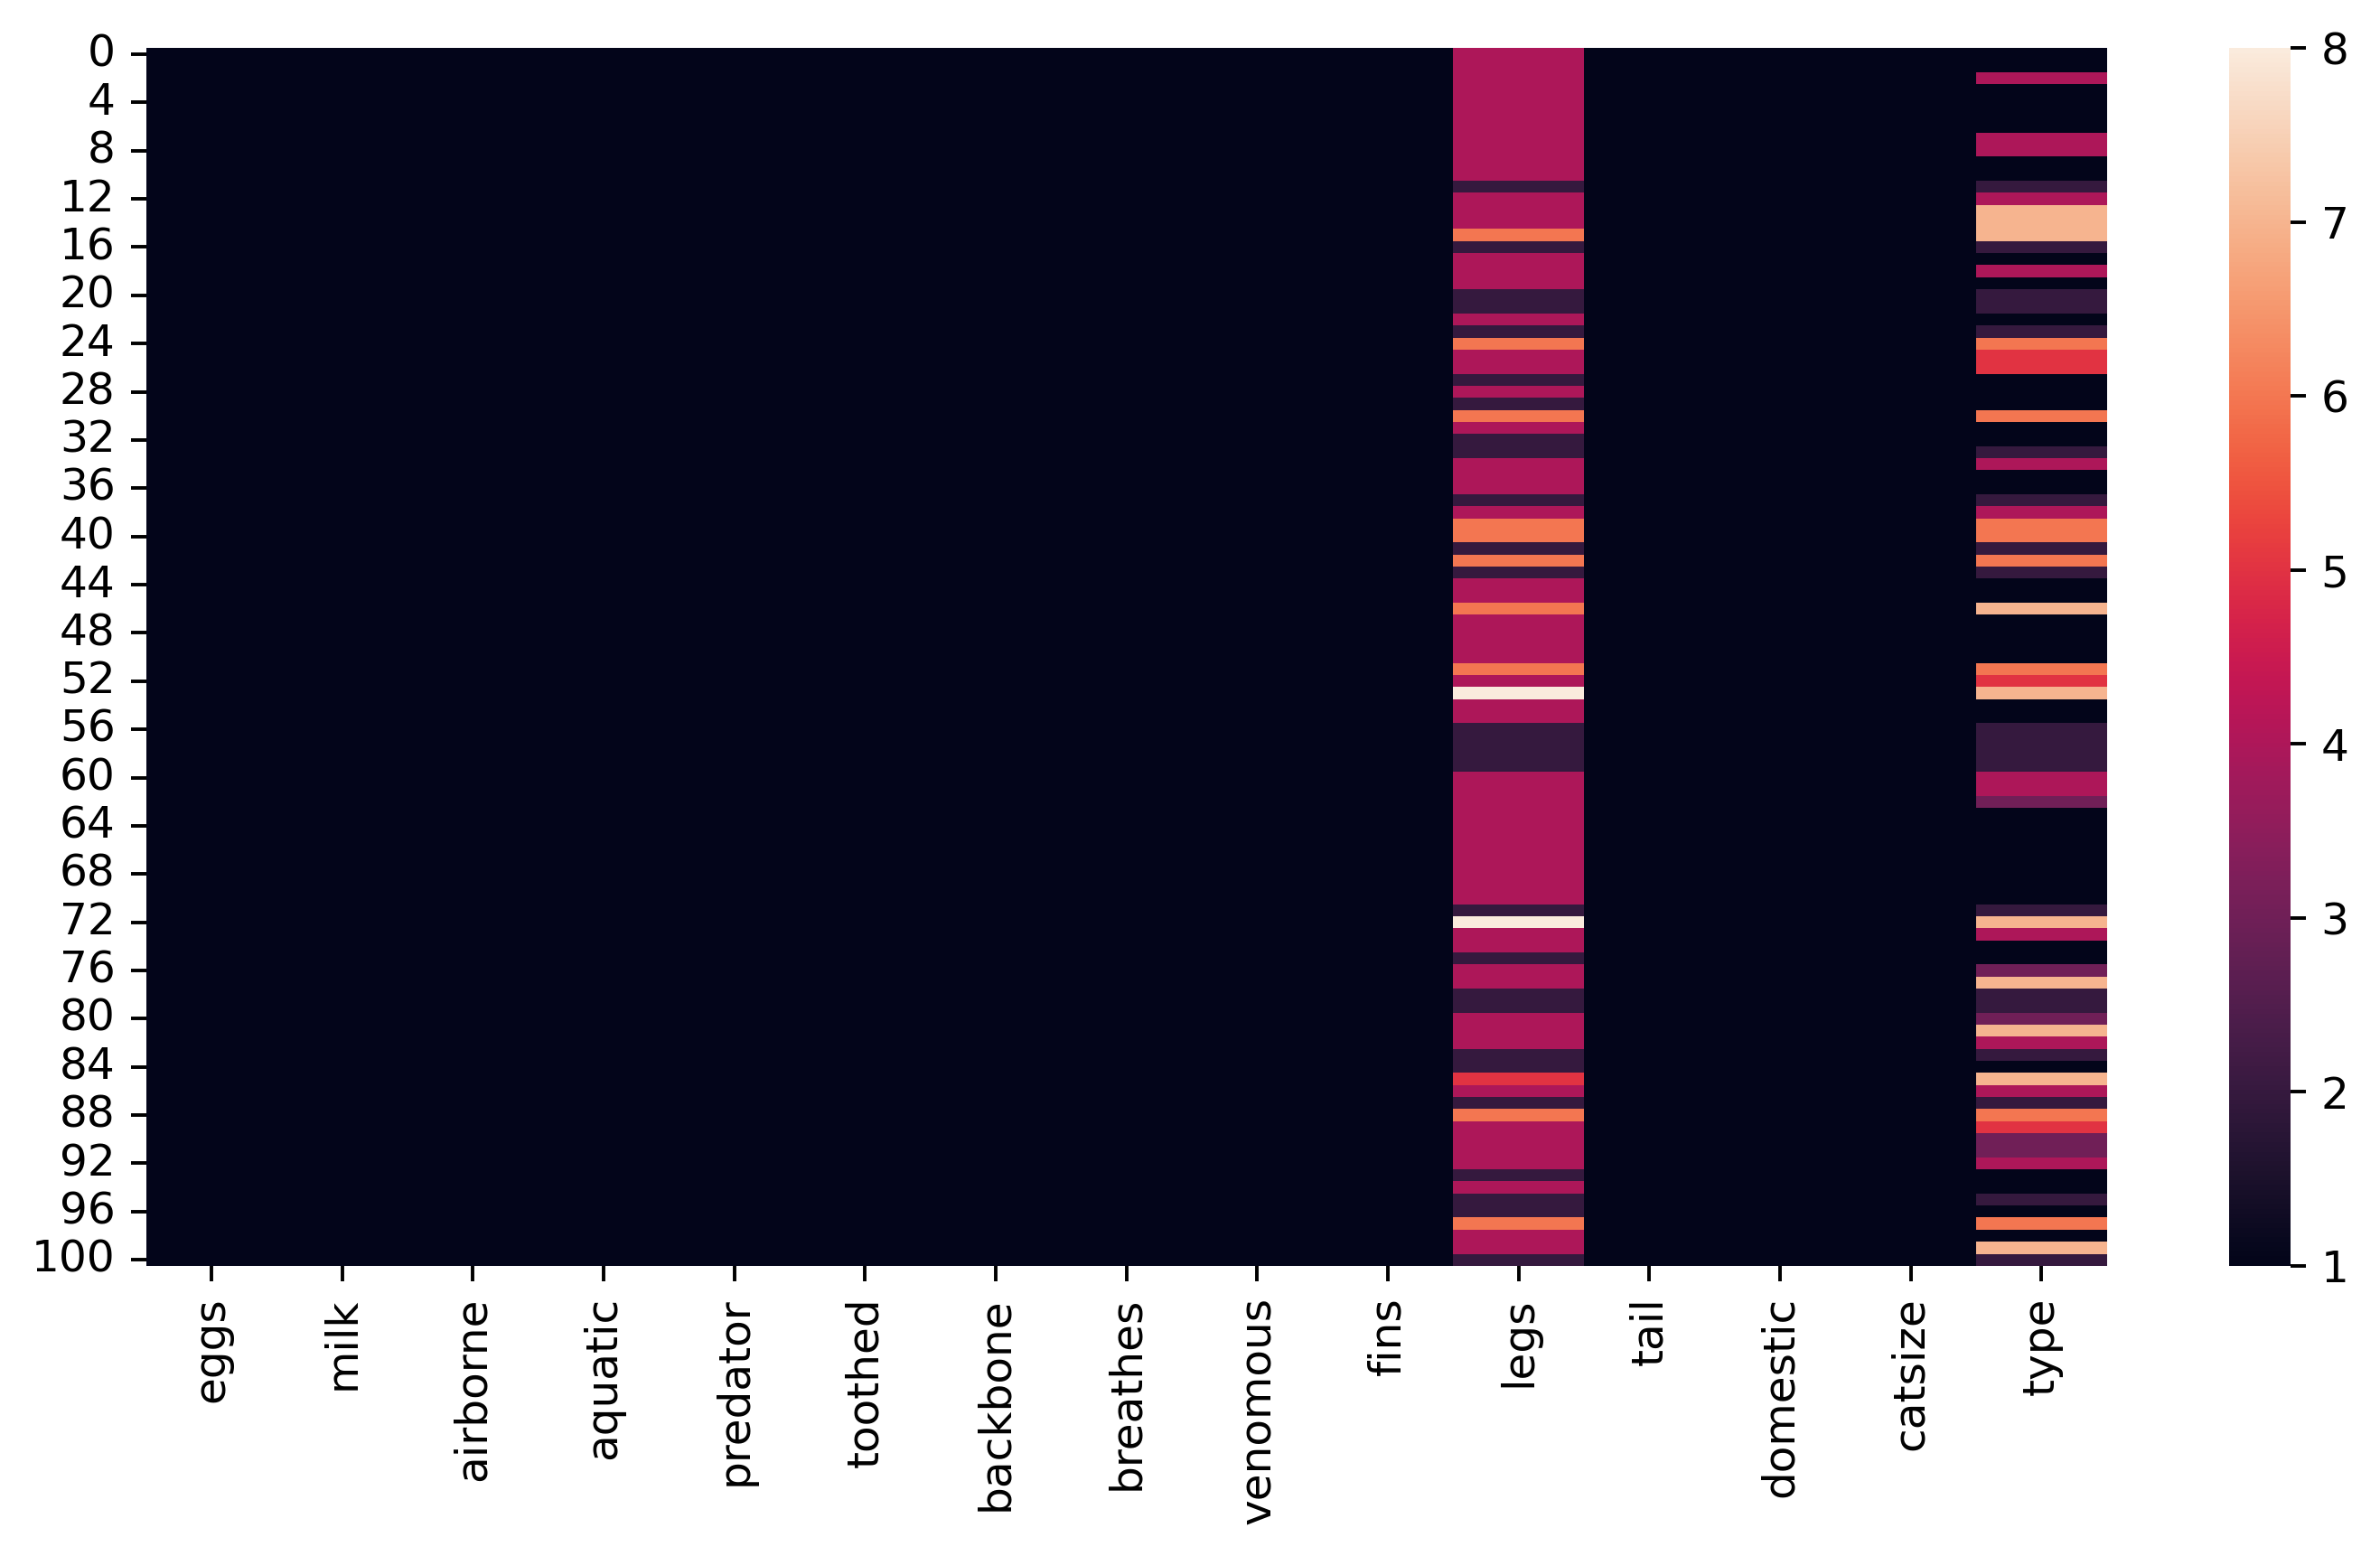

In [20]:
sns.heatmap(df.iloc[:,2:])

In [41]:
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [21]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [22]:
df.groupby('type').agg('mean')

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
type,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.658537,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.000000,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.300000,1.0,1.0,1.0


# feature Scaling and splitting the data

In [44]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0
99,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0


In [43]:
x = df.iloc[:,:-1]
y = df['type']

In [45]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [46]:
sc = StandardScaler()
x =sc.fit_transform(x)

In [47]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# model building
### if we don't know the value of k,so we are considering randomly k=3

In [48]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [49]:
ypred

array([4, 1, 4, 1, 4, 6, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1],
      dtype=int64)

In [50]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.35, 0.09523809523809523)

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.17      0.09      0.12        11
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         1
           4       0.07      1.00      0.13         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2

    accuracy                           0.10        21
   macro avg       0.03      0.16      0.04        21
weighted avg       0.09      0.10      0.07        21



### to increase the accuracy of model and to overcome with overfitting.

In [53]:
trainac=[]
testac=[]

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtrain,ytrain))

In [33]:
trainac

[0.35,
 0.5,
 0.35,
 0.6125,
 0.6125,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875]

In [54]:
testac

[0.35,
 0.5,
 0.35,
 0.6125,
 0.6125,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875]

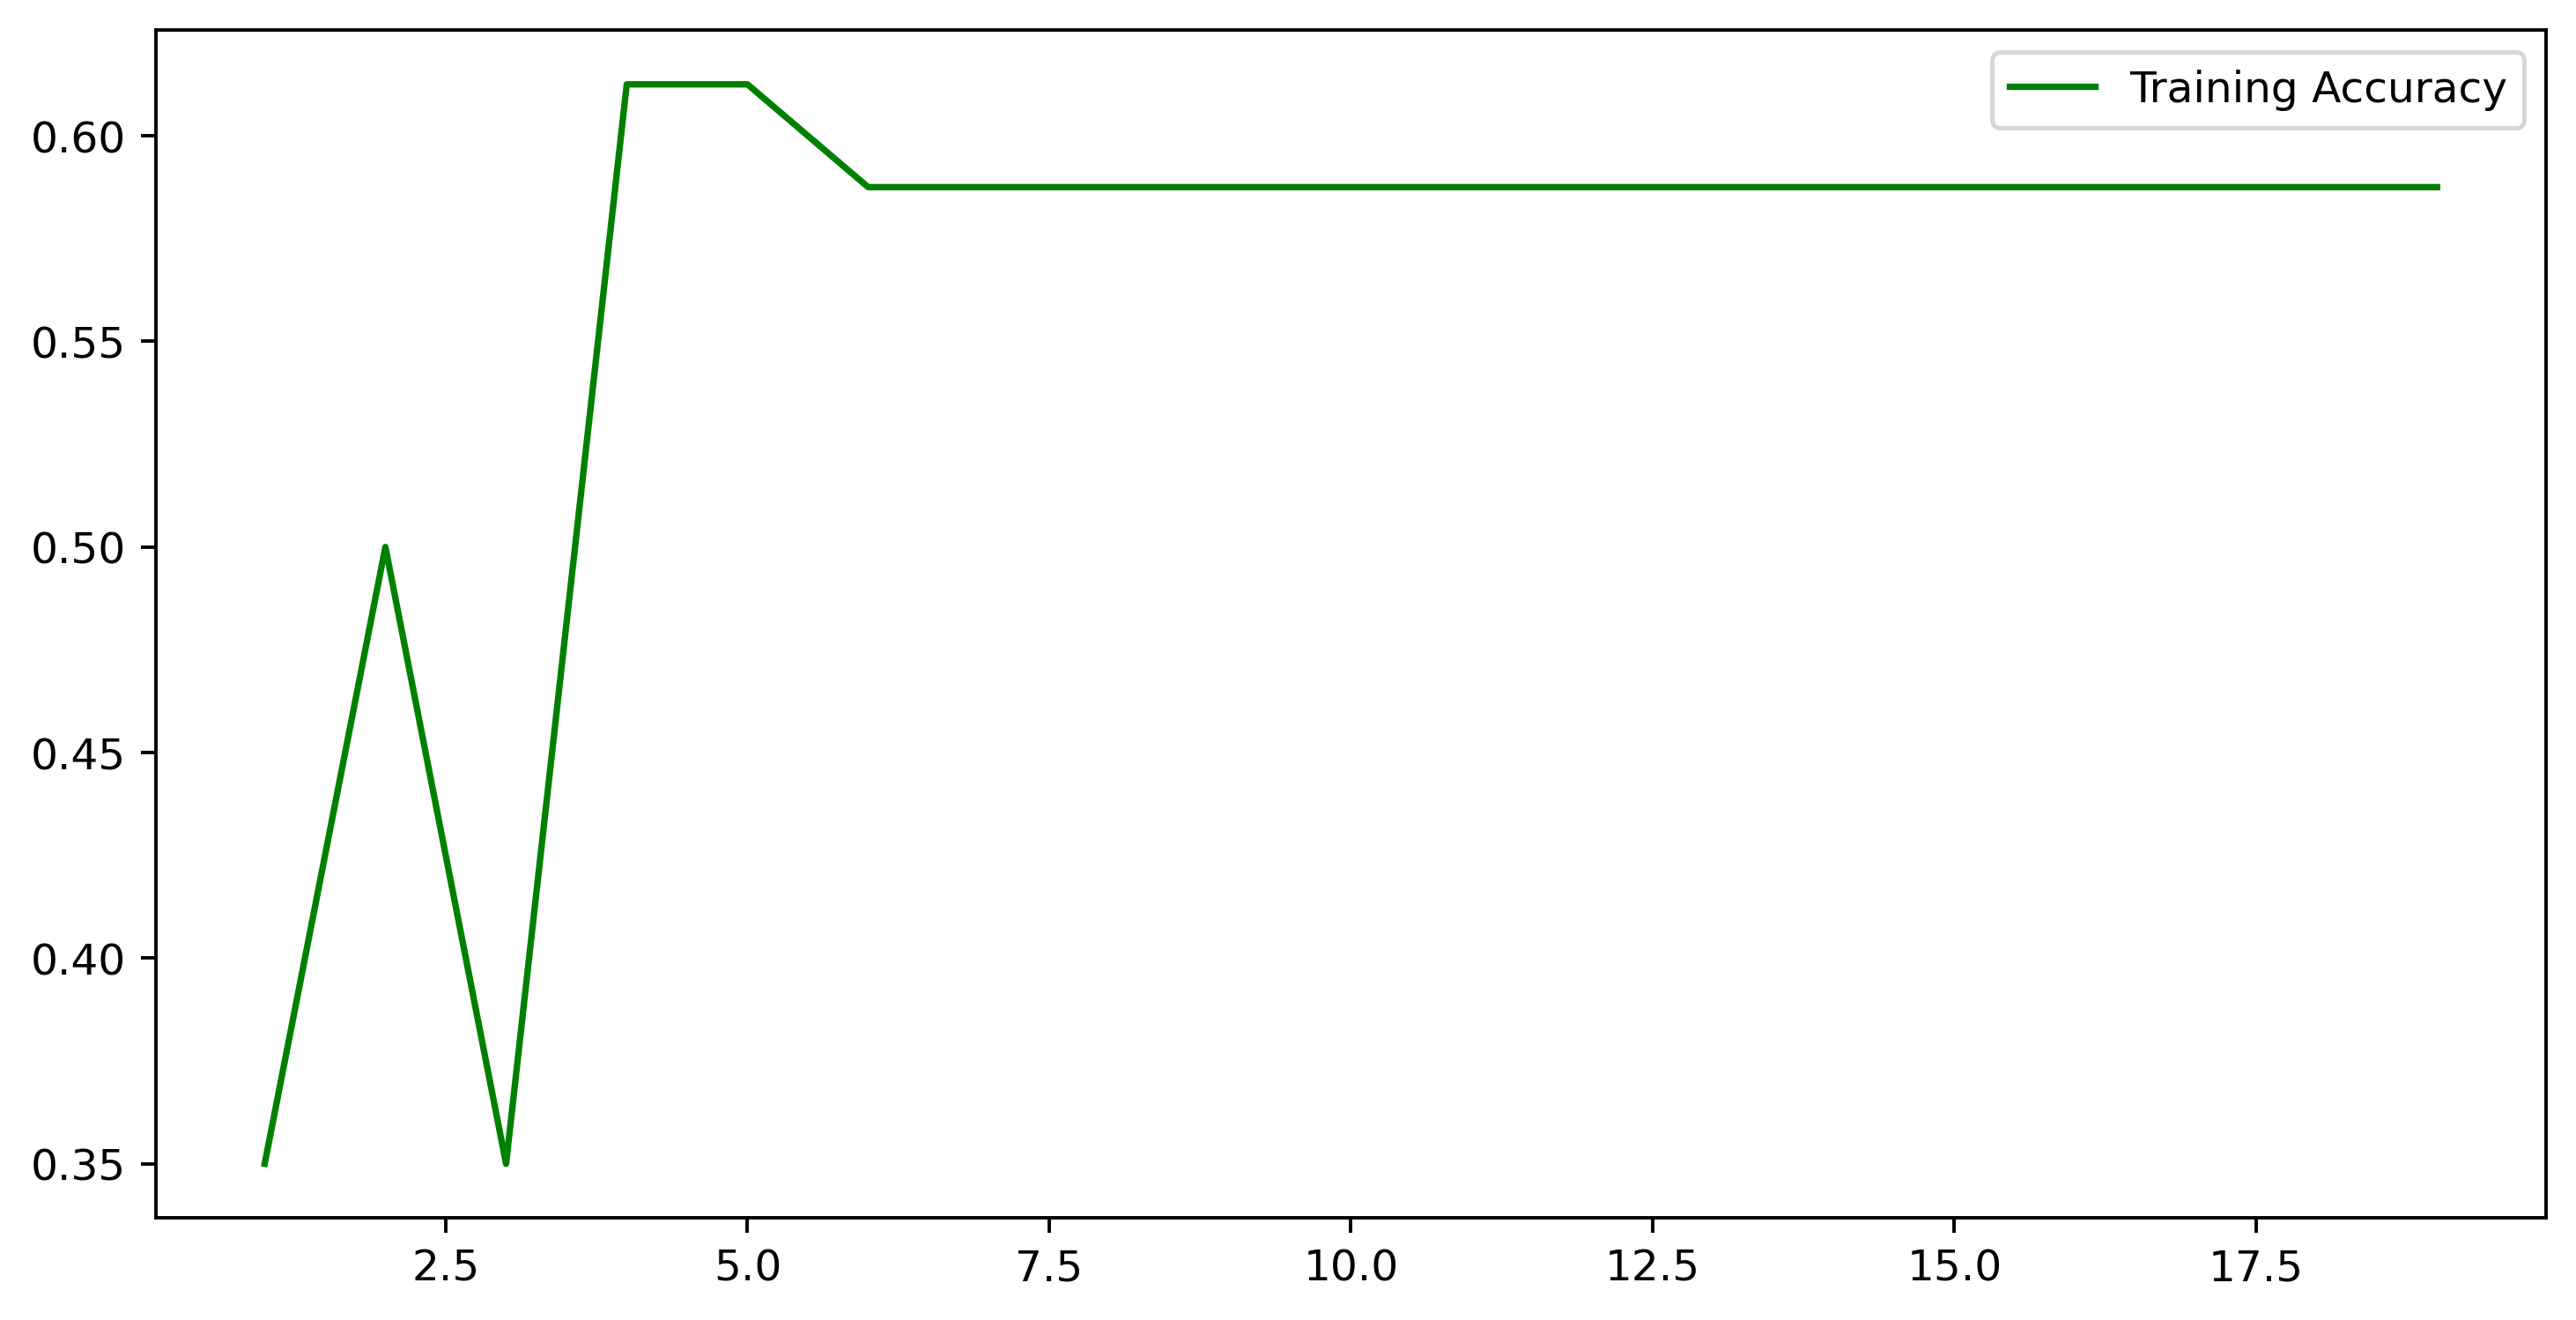

In [35]:
plt.plot(range(1,20),trainac,color='green',label='Training Accuracy')
#plt.plot(range(1,20),testac,color='blue',label='Testing Accuracy')
#plt.xlabel(" K values")
#plt.ylabel("Accuracy")
plt.legend()

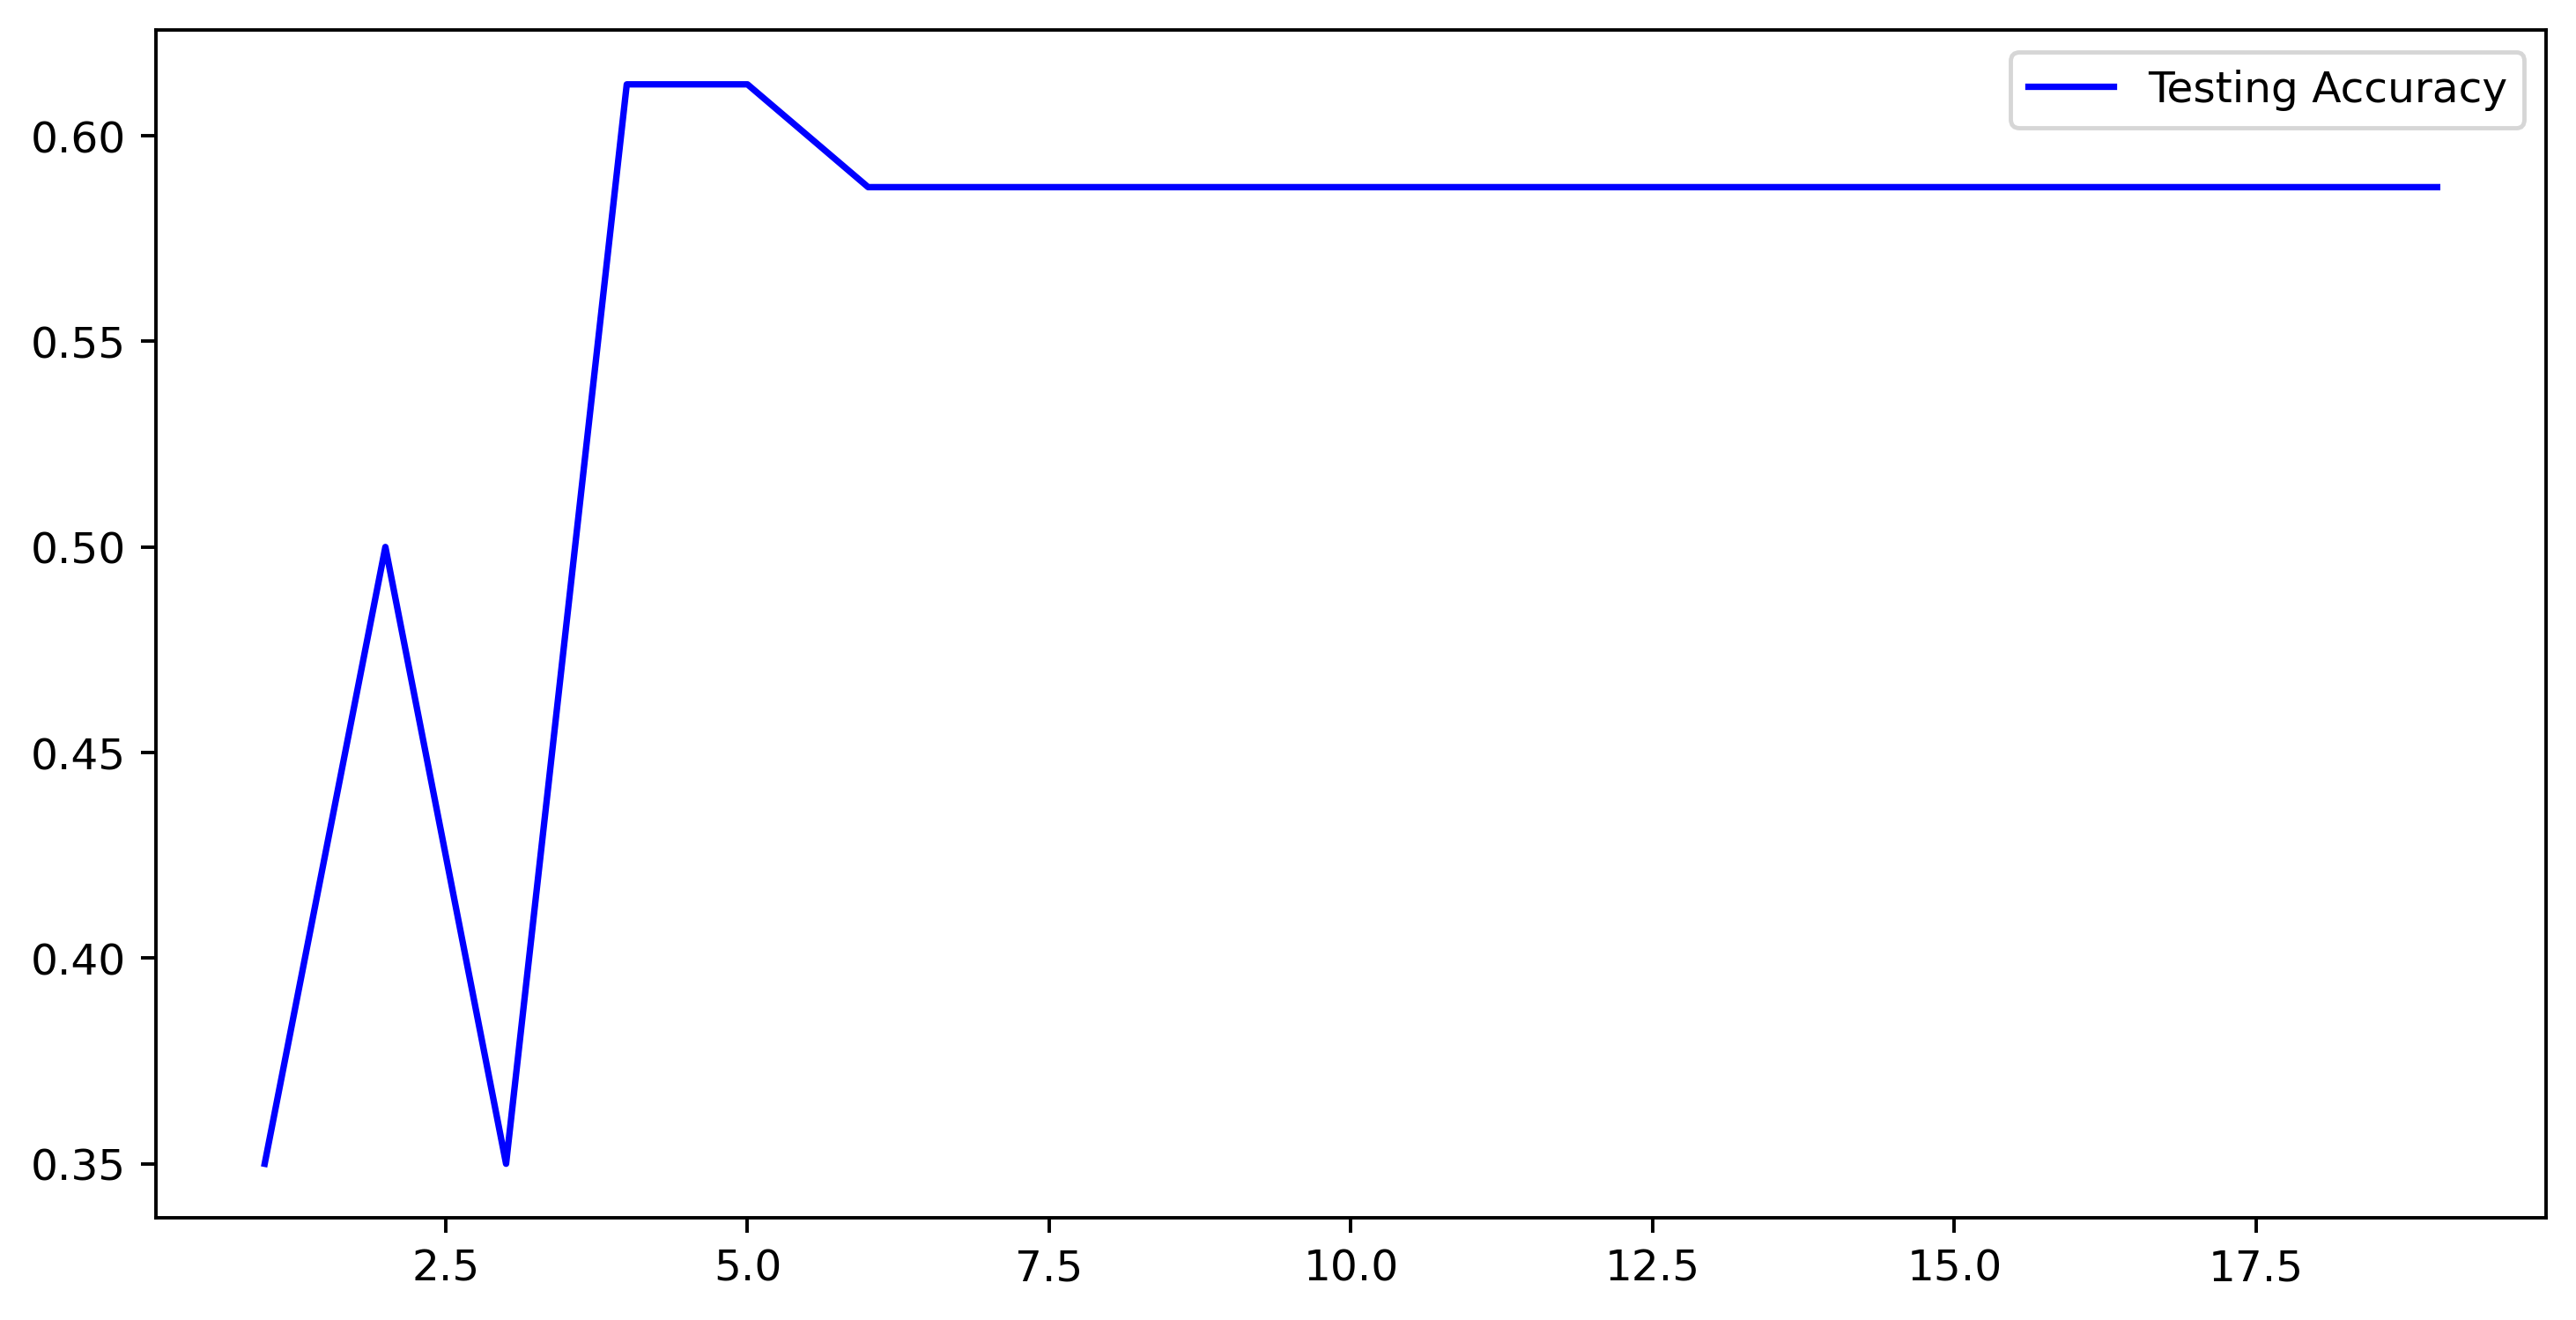

In [36]:
plt.plot(range(1,20),testac,color='blue',label='Testing Accuracy')
plt.legend()

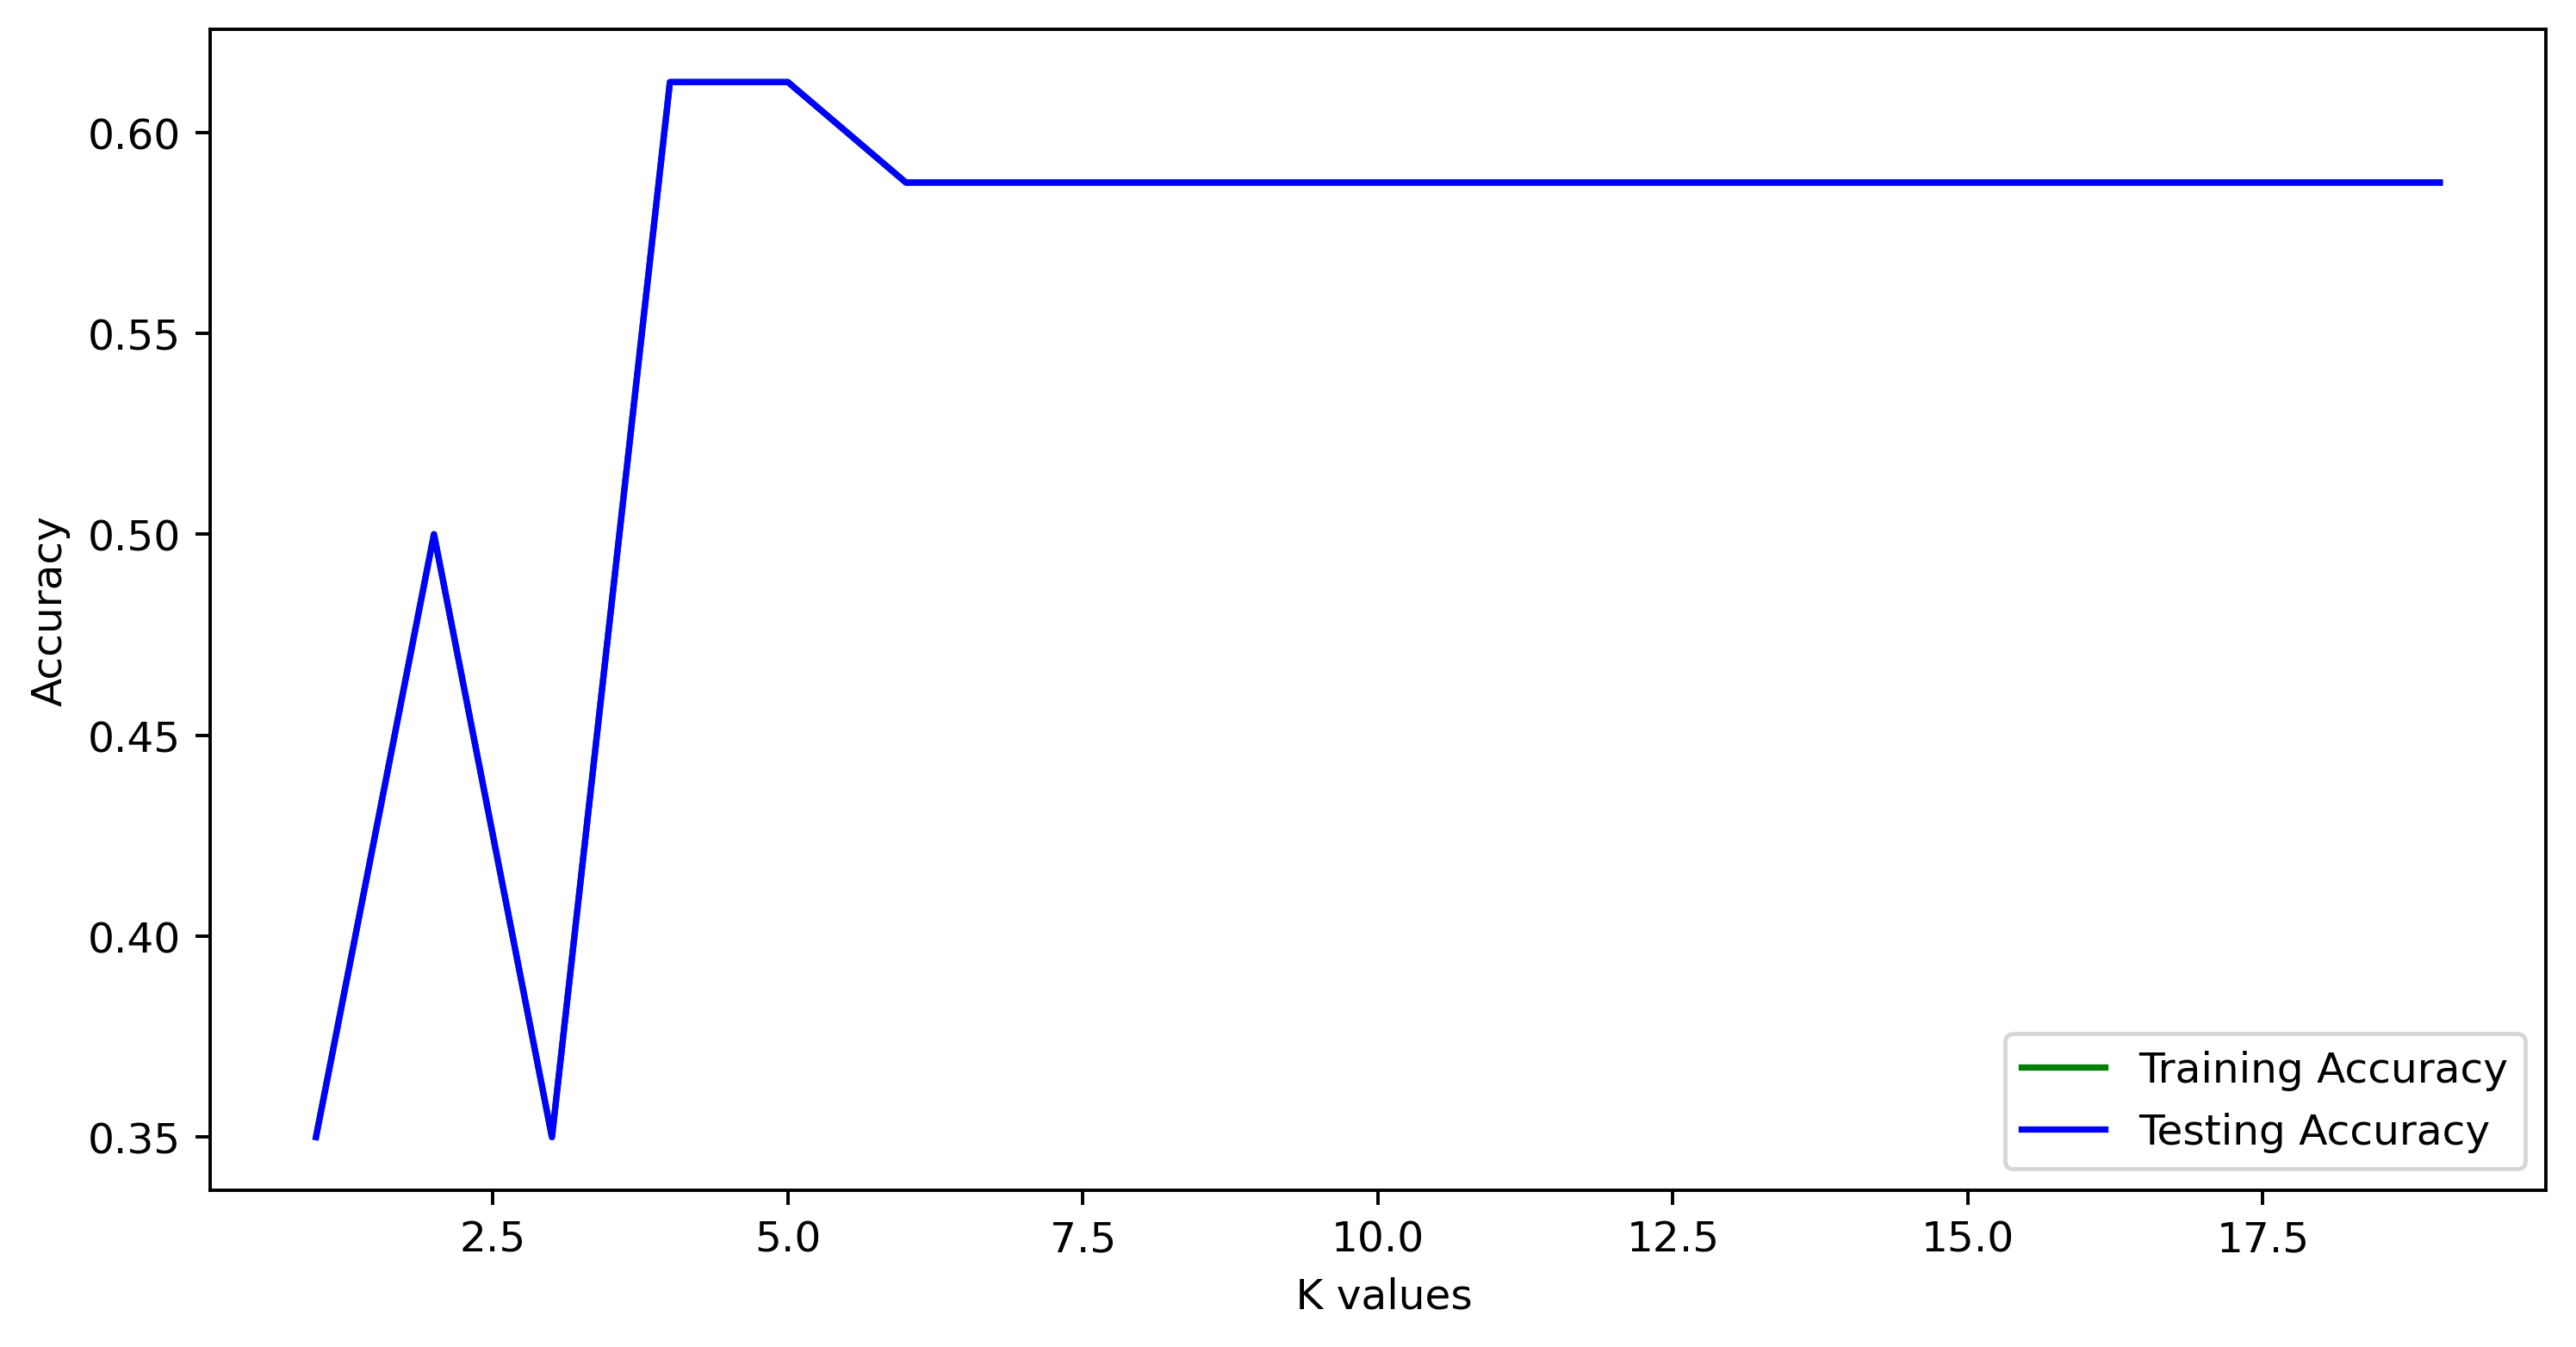

In [37]:
plt.plot(range(1,20),trainac,color='green',label='Training Accuracy')
plt.plot(range(1,20),testac,color='blue',label='Testing Accuracy')
plt.xlabel(" K values")
plt.ylabel("Accuracy")
plt.legend()

In [58]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [59]:
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.6125, 0.7142857142857143)

In [60]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.83      1.00      0.91         5
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2

    accuracy                           0.71        21
   macro avg       0.22      0.27      0.24        21
weighted avg       0.57      0.71      0.64        21



### After  k=12 ,accuaracy is not changing.